In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_1 = 939  # MeV
P_1 = 2.0877  # MeV/fm³
n_0 = 0.16  # fm⁻³
n_1 = 1.1 * n_0  # fm⁻³
epsilon_1 = 165.47  # MeV/fm³
#cs2_1 = 0.22080181
cs2_1 = 0.220979082
#cs2_1 = 0.1385

In [3]:
def generate_points(N, mu_1=939, mu_N1=2600):
    """
    Generate random mu_points and cs2_points for piecewise linear c_s^2(mu).
    
    Parameters:
    N (int): Number of segments (e.g., 3, 4, 5, 7).
    mu_1 (float): Starting mu value in MeV.
    mu_N1 (float): Ending mu value in MeV.
    
    Returns:
    mu_points (list): List of mu values in increasing order.
    cs2_points (list): List of c_s^2 values corresponding to mu_points.
    """
   # c_s_max2 = np.random.uniform(0, 1)
    c_s_max2 = np.random.uniform(0.82, 1)
    print(c_s_max2)
    if N > 1:
        intermediate_mus = np.random.uniform(mu_1, mu_N1, N-1)
        #intermediate_mus.sort()
        # Sample more points in the crucial density range (2-4× nuclear)
        
        #intermediate_mus.sort()
    else:
        intermediate_mus = []
    mu_points = [mu_1] + list(intermediate_mus) + [mu_N1]

    intermediate_cs2 = np.random.uniform(cs2_1,c_s_max2,N)
    
    cs2_points = [cs2_1] + list(intermediate_cs2)
    #cs2_points.sort()
    
    return mu_points, cs2_points

In [5]:
# Generate piecewise linear c_s²(μ) parameters
N = 7  # Number of segments, can be 3, 4, 5, or 7
mu_points, cs2_points = generate_points(N, mu_1=939, mu_N1=2600)

0.8881230619154579


In [9]:
print(cs2_points)
print(mu_points)

[0.220979082, 0.4591492247580451, 0.7289736699059743, 0.6526934636552764, 0.3890686394583063, 0.4360861388403163, 0.39194862584089585, 0.2678319669967667]
[939, 1992.8909281809506, 1087.3740378060616, 2306.394963782654, 2515.346740334982, 1401.2077644025476, 2081.8623904185997, 2600]


In [11]:
#Define c_s²(μ) with linear interpolation
def c_s2(mu):
    if mu <= mu_points[0]:
        return cs2_points[0]
    elif mu >= mu_points[-1]:
        return cs2_points[-1]
    for i in range(len(mu_points) - 1):
        if mu_points[i] <= mu <= mu_points[i + 1]:
            return (cs2_points[i] * (mu_points[i + 1] - mu) + cs2_points[i + 1] * (mu - mu_points[i])) / (mu_points[i + 1] - mu_points[i])

In [13]:
# from scipy.interpolate import interp1d
# c_s2 = interp1d(mu_points, cs2_points, kind='linear', fill_value='extrapolate')

In [15]:
# Simpson's 1/3 rule implementation
def simpson_integrate(f, a, b, n=200):
    """
    Integrate function f from a to b using Simpson's 1/3 rule.
    
    Parameters:
    f: Function to integrate
    a, b: Integration limits
    n: Number of intervals (must be even)
    
    Returns:
    Integral value
    """
    if n % 2 != 0:
        n += 1  # Ensure n is even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = np.array([f(xi) for xi in x])
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])


In [17]:
# Integrand for equation (2)
def integrand_eq2(mu_prime):
    cs2 = c_s2(mu_prime)
    return 1 / (mu_prime * cs2) if cs2 != 0 else 0

# n(μ) from equation (2)
def n_mu(mu):
    if mu == mu_1:
        return n_1
    integral = simpson_integrate(integrand_eq2, mu_1, mu)
    return n_1 * np.exp(integral)

In [19]:
# Integrand for equation (3)
def integrand_eq3(mu_prime):
    return n_mu(mu_prime)

# P(μ) from equation (3)
def P_mu(mu):
    if mu == mu_1:
        return P_1
    integral = simpson_integrate(integrand_eq3, mu_1, mu)
    return P_1 + integral

In [21]:
# Integrand for equation (4)
def integrand_eq4(mu_prime):
    cs2 = c_s2(mu_prime)
    return n_mu(mu_prime) / cs2 if cs2 != 0 else 0

# ε(μ) from equation (4)
def epsilon_mu(mu):
    if mu == mu_1:
        return epsilon_1
    integral = simpson_integrate(integrand_eq4, mu_1, mu)
    return epsilon_1 + integral

In [23]:

mu_grid = np.linspace(mu_1, 2600, 200)  # Higher resolution

In [25]:
# Compute grids
n_grid = np.array([n_mu(mu) for mu in mu_grid])
P_grid = np.array([P_mu(mu) for mu in mu_grid])
cs2_grid = np.array([c_s2(mu) for mu in mu_grid])
epsilon_grid = np.array([epsilon_mu(mu) for mu in mu_grid])


In [27]:
# Convert n to n/n_0
n_over_n0 = n_grid / n_0
print(n_over_n0)

[ 1.1         1.14475208  1.19051148  1.23727626  1.28504407  1.33381214
  1.38357734  1.43433616  1.4860847   1.53881876  1.59253379  1.6472249
  1.70288693  1.7595144   1.81710157  1.87564242  1.93513068  1.99555983
  2.05692313  2.11921362  2.18242412  2.24654726  2.31157549  2.37750106
  2.44431608  2.51201249  2.58058209  2.65001653  2.72030735  2.79144597
  2.86342367  2.93623166  3.00986104  3.08430282  3.15954795  3.23558729
  3.31241164  3.39001174  3.46837829  3.54750191  3.62737323  3.70798282
  3.78932121  3.87137893  3.95414649  4.03761438  4.12177308  4.20661308
  4.29212486  4.37829892  4.46512575  4.55259588  4.64069983  4.72942817
  4.81877146  4.90872033  4.99926541  5.09039737  5.18210693  5.27438483
  5.36722188  5.4606089   5.55453679  5.64899648  5.74397895  5.83947525
  5.93547647  6.03197376  6.12895833  6.22642146  6.32435447  6.42274876
  6.5215958   6.62088709  6.72061425  6.82076891  6.92134282  7.02232777
  7.12371563  7.22549833  7.32766788  7.43021637  7.

In [29]:
print(mu_grid)

[ 939.          947.34673367  955.69346734  964.04020101  972.38693467
  980.73366834  989.08040201  997.42713568 1005.77386935 1014.12060302
 1022.46733668 1030.81407035 1039.16080402 1047.50753769 1055.85427136
 1064.20100503 1072.54773869 1080.89447236 1089.24120603 1097.5879397
 1105.93467337 1114.28140704 1122.6281407  1130.97487437 1139.32160804
 1147.66834171 1156.01507538 1164.36180905 1172.70854271 1181.05527638
 1189.40201005 1197.74874372 1206.09547739 1214.44221106 1222.78894472
 1231.13567839 1239.48241206 1247.82914573 1256.1758794  1264.52261307
 1272.86934673 1281.2160804  1289.56281407 1297.90954774 1306.25628141
 1314.60301508 1322.94974874 1331.29648241 1339.64321608 1347.98994975
 1356.33668342 1364.68341709 1373.03015075 1381.37688442 1389.72361809
 1398.07035176 1406.41708543 1414.7638191  1423.11055276 1431.45728643
 1439.8040201  1448.15075377 1456.49748744 1464.84422111 1473.19095477
 1481.53768844 1489.88442211 1498.23115578 1506.57788945 1514.92462312
 1523.2

In [31]:
print(P_grid * 1.6022e33)

[3.34491294e+33 5.74628329e+33 8.24448774e+33 1.08416797e+34
 1.35400078e+34 1.63416155e+34 1.92486397e+34 2.22632102e+34
 2.53874491e+34 2.86234696e+34 3.19733755e+34 3.54392608e+34
 3.90232084e+34 4.27272901e+34 4.65535654e+34 5.05040815e+34
 5.45808723e+34 5.87859581e+34 6.31213448e+34 6.75890239e+34
 7.21909717e+34 7.69291488e+34 8.18055000e+34 8.68219536e+34
 9.19804213e+34 9.72827976e+34 1.02730960e+35 1.08326767e+35
 1.14072061e+35 1.19968665e+35 1.26018384e+35 1.32223003e+35
 1.38584291e+35 1.45103993e+35 1.51783841e+35 1.58625541e+35
 1.65630785e+35 1.72801241e+35 1.80138560e+35 1.87644372e+35
 1.95320287e+35 2.03167893e+35 2.11188762e+35 2.19384442e+35
 2.27756462e+35 2.36306330e+35 2.45035536e+35 2.53945548e+35
 2.63037811e+35 2.72313755e+35 2.81774786e+35 2.91422290e+35
 3.01257634e+35 3.11282163e+35 3.21497205e+35 3.31904064e+35
 3.42504026e+35 3.53298357e+35 3.64288304e+35 3.75475091e+35
 3.86859925e+35 3.98443992e+35 4.10228461e+35 4.22214477e+35
 4.34403170e+35 4.467956

In [33]:
print(cs2_grid)

[0.22097908 0.22286537 0.22475166 0.22663795 0.22852424 0.23041053
 0.23229682 0.2341831  0.23606939 0.23795568 0.23984197 0.24172826
 0.24361455 0.24550084 0.24738713 0.24927342 0.2511597  0.25304599
 0.25493228 0.25681857 0.25870486 0.26059115 0.26247744 0.26436373
 0.26625002 0.2681363  0.27002259 0.27190888 0.27379517 0.27568146
 0.27756775 0.27945404 0.28134033 0.28322662 0.2851129  0.28699919
 0.28888548 0.29077177 0.29265806 0.29454435 0.29643064 0.29831693
 0.30020322 0.3020895  0.30397579 0.30586208 0.30774837 0.30963466
 0.31152095 0.31340724 0.31529353 0.31717982 0.3190661  0.32095239
 0.32283868 0.32472497 0.32661126 0.32849755 0.33038384 0.33227013
 0.33415642 0.3360427  0.33792899 0.33981528 0.34170157 0.34358786
 0.34547415 0.34736044 0.34924673 0.35113302 0.3530193  0.35490559
 0.35679188 0.35867817 0.36056446 0.36245075 0.36433704 0.36622333
 0.36810962 0.3699959  0.37188219 0.37376848 0.37565477 0.37754106
 0.37942735 0.38131364 0.38319993 0.38508622 0.3869725  0.3888

In [35]:
print(epsilon_grid*(1.7827e12))

[2.94983369e+14 3.07022918e+14 3.19442401e+14 3.32246084e+14
 3.45438102e+14 3.59022465e+14 3.73003051e+14 3.87383613e+14
 4.02167774e+14 4.17359032e+14 4.32960756e+14 4.48976190e+14
 4.65408455e+14 4.82260545e+14 4.99535334e+14 5.17235571e+14
 5.35363887e+14 5.53922791e+14 5.72914677e+14 5.92341820e+14
 6.12206381e+14 6.32510406e+14 6.53255829e+14 6.74444475e+14
 6.96078058e+14 7.18158185e+14 7.40686358e+14 7.63663975e+14
 7.87092330e+14 8.10972618e+14 8.35305935e+14 8.60093280e+14
 8.85335555e+14 9.11033571e+14 9.37188046e+14 9.63799608e+14
 9.90868797e+14 1.01839607e+15 1.04638179e+15 1.07482624e+15
 1.10372964e+15 1.13309210e+15 1.16291368e+15 1.19319435e+15
 1.22393401e+15 1.25513248e+15 1.28678952e+15 1.31890482e+15
 1.35147799e+15 1.38450859e+15 1.41799611e+15 1.45193999e+15
 1.48633957e+15 1.52119418e+15 1.55650307e+15 1.59226542e+15
 1.62848038e+15 1.66514703e+15 1.70226441e+15 1.73983151e+15
 1.77784726e+15 1.81631055e+15 1.85522022e+15 1.89457507e+15
 1.93437385e+15 1.974615

In [37]:
# Filter for the desired range: 1.1 n_0 to 40 n_0
mask = (n_over_n0 > 1.1) & (n_over_n0 <= 40)
n_plot = n_over_n0[mask]
P_plot = P_grid[mask]
cs2_plot = cs2_grid[mask]
epsilon_plot = epsilon_grid[mask]

In [39]:
print(epsilon_plot*(1.7827e12))

[3.07022918e+14 3.19442401e+14 3.32246084e+14 3.45438102e+14
 3.59022465e+14 3.73003051e+14 3.87383613e+14 4.02167774e+14
 4.17359032e+14 4.32960756e+14 4.48976190e+14 4.65408455e+14
 4.82260545e+14 4.99535334e+14 5.17235571e+14 5.35363887e+14
 5.53922791e+14 5.72914677e+14 5.92341820e+14 6.12206381e+14
 6.32510406e+14 6.53255829e+14 6.74444475e+14 6.96078058e+14
 7.18158185e+14 7.40686358e+14 7.63663975e+14 7.87092330e+14
 8.10972618e+14 8.35305935e+14 8.60093280e+14 8.85335555e+14
 9.11033571e+14 9.37188046e+14 9.63799608e+14 9.90868797e+14
 1.01839607e+15 1.04638179e+15 1.07482624e+15 1.10372964e+15
 1.13309210e+15 1.16291368e+15 1.19319435e+15 1.22393401e+15
 1.25513248e+15 1.28678952e+15 1.31890482e+15 1.35147799e+15
 1.38450859e+15 1.41799611e+15 1.45193999e+15 1.48633957e+15
 1.52119418e+15 1.55650307e+15 1.59226542e+15 1.62848038e+15
 1.66514703e+15 1.70226441e+15 1.73983151e+15 1.77784726e+15
 1.81631055e+15 1.85522022e+15 1.89457507e+15 1.93437385e+15
 1.97461529e+15 2.015298

In [41]:
print(cs2_plot)

[0.22286537 0.22475166 0.22663795 0.22852424 0.23041053 0.23229682
 0.2341831  0.23606939 0.23795568 0.23984197 0.24172826 0.24361455
 0.24550084 0.24738713 0.24927342 0.2511597  0.25304599 0.25493228
 0.25681857 0.25870486 0.26059115 0.26247744 0.26436373 0.26625002
 0.2681363  0.27002259 0.27190888 0.27379517 0.27568146 0.27756775
 0.27945404 0.28134033 0.28322662 0.2851129  0.28699919 0.28888548
 0.29077177 0.29265806 0.29454435 0.29643064 0.29831693 0.30020322
 0.3020895  0.30397579 0.30586208 0.30774837 0.30963466 0.31152095
 0.31340724 0.31529353 0.31717982 0.3190661  0.32095239 0.32283868
 0.32472497 0.32661126 0.32849755 0.33038384 0.33227013 0.33415642
 0.3360427  0.33792899 0.33981528 0.34170157 0.34358786 0.34547415
 0.34736044 0.34924673 0.35113302 0.3530193  0.35490559 0.35679188
 0.35867817 0.36056446 0.36245075 0.36433704 0.36622333 0.36810962
 0.3699959  0.37188219 0.37376848 0.37565477 0.37754106 0.37942735
 0.38131364 0.38319993 0.38508622 0.3869725  0.38885879 0.3907

In [43]:
p = P_plot * 1.6022e33
epsilon = epsilon_plot * 1.7827e12

In [45]:
result_array = np.column_stack((p, epsilon, cs2_plot))

In [47]:
data_BPS = np.loadtxt("data_k")
pres_BPS = data_BPS[:,0]
rho_BPS = data_BPS[:,1]

In [49]:
data_polytropic_grok = np.loadtxt("data_polytropic_5")
pres_polytropic = data_polytropic_grok[:,0]
rho_polytropic = data_polytropic_grok[:,1]

In [51]:
from TOVsolver.unit import g_cm_3, dyn_cm_2, km, Msun, MeV, fm

In [53]:
pres_total = np.hstack((pres_BPS,pres_polytropic,result_array[:,0]))* dyn_cm_2
eps_total = np.hstack((rho_BPS,rho_polytropic,result_array[:,1]))*g_cm_3
#Last_attempt = np.column_stack((pres_total,eps_total))
#np.savetxt("data_new_1", Last_attempt,  fmt="%.6e")

In [55]:
print(pres_total)
print(eps_total)
import numpy as np

# Load data
#data_new = np.loadtxt("data_new_1")
#P1 = data_new[:,0] * dyn_cm_2
#rho1 = data_new[:,1] * g_cm_3

P1 = pres_total
rho1 = eps_total

# Check for duplicates in rho1
if len(rho1) != len(np.unique(rho1)):
    print("Duplicate values found in rho1 (density):")
    unique, counts = np.unique(rho1, return_counts=True)
    duplicates = unique[counts > 1]
    print(f"Duplicate density values: {duplicates}")
else:
    print("No duplicates in rho1")

# Check for duplicates in P1
if len(P1) != len(np.unique(P1)):
    print("Duplicate values found in P1 (pressure):")
    unique, counts = np.unique(P1, return_counts=True)
    duplicates = unique[counts > 1]
    print(f"Duplicate pressure values: {duplicates}")
else:
    print("No duplicates in P1")

[3.02141162e-17 1.69068937e-15 7.36119289e-14 ... 1.25692118e+01
 1.27041850e+01 1.28434800e+01]
[2.94096142e-11 2.98486062e-10 2.98086978e-09 ... 2.95970455e+01
 3.01393286e+01 3.05847968e+01]
No duplicates in rho1
No duplicates in P1


In [57]:
# Remove duplicates while keeping the first occurrence
unique_indices = np.unique(rho1, return_index=True)[1]
unique_indices = np.sort(unique_indices)  # Ensure order is preserved
rho1_new = rho1[unique_indices]
P1_new = P1[unique_indices]

print(f"After removing duplicates, rho1 shape: {rho1.shape}, P1 shape: {P1.shape}")

After removing duplicates, rho1 shape: (1283,), P1 shape: (1283,)


In [59]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3, dyn_cm_2, km, Msun, MeV, fm

In [61]:
MR_EOS = main.OutputMR("",rho1_new,P1_new).T
MRT_EOS = main.OutputMRT("",rho1_new,P1_new).T

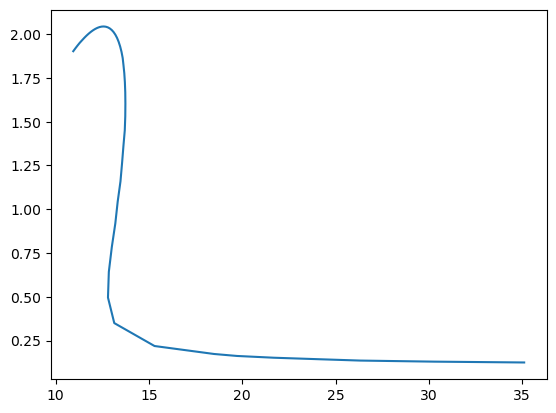

2.0442333686008283


In [63]:
plt.plot(MR_EOS[1]/km,MR_EOS[0]/Msun)
plt.show()
print(np.max(MR_EOS[0]/Msun))

In [65]:
MR_EOS[0]/Msun

array([0.12462229, 0.12938062, 0.13551505, 0.14300131, 0.1517669 ,
       0.16182573, 0.17317367, 0.21866826, 0.34969838, 0.49543163,
       0.6423316 , 0.7842055 , 0.9183365 , 1.04346558, 1.15914212,
       1.26541771, 1.36252639, 1.45084148, 1.53085824, 1.60305244,
       1.66794541, 1.72600709, 1.7777277 , 1.82354997, 1.86390749,
       1.89920423, 1.92981326, 1.95607378, 1.97831481, 1.99683582,
       2.01191326, 2.02382025, 2.03279675, 2.03905025, 2.04279391,
       2.04423337, 2.04353916, 2.04088325, 2.03641254, 2.03027179,
       2.02260781, 2.0135336 , 2.00317373, 1.99163225, 1.97901331,
       1.96541522, 1.95092545, 1.9356271 , 1.91959632, 1.90290547])

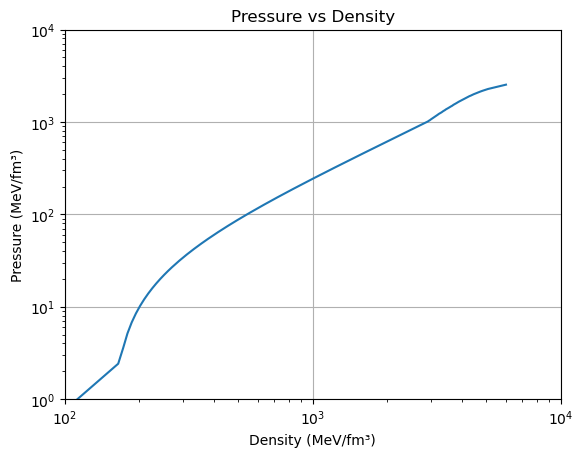

In [67]:
# Plotting
plt.plot( rho1_new/(g_cm_3*(1.7827e12)), P1_new/(dyn_cm_2*(1.6022e33)))
plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density')
plt.xscale("log")
plt.yscale("log")
plt.xlim([10**2,10**4])
plt.ylim([10**0,10**4])
plt.grid(True)
#plt.legend()
plt.show()

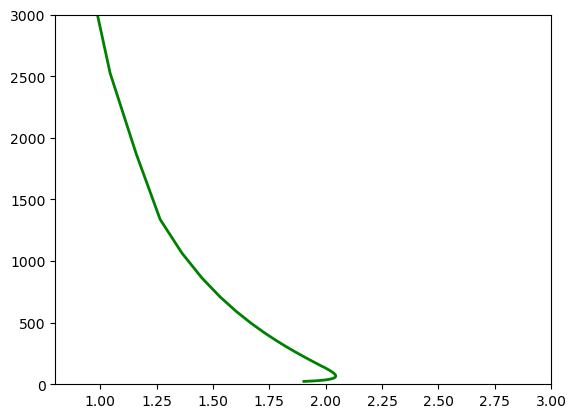

In [69]:
plt.plot(MRT_EOS[1]/Msun, MRT_EOS[2] ,'g-', lw=2,label ="MS1")
plt.ylim([0,3000])
plt.xlim([0.8,3])
plt.show()

In [71]:
print(rho1/g_cm_3)
print(len(rho1/g_cm_3))
print(len(P1/dyn_cm_2))
print(len(cs2_plot))

[1.03170000e+04 1.04710000e+05 1.04570000e+06 ... 1.03827516e+16
 1.05729865e+16 1.07292584e+16]
1283
1283
199


In [73]:
column_1 = np.ones(1283)  # Placeholder for rho1
column_2 = np.ones(1283)  # Placeholder for P1
column_3 = np.ones(199)  # Placeholder for cs2_plot



# Verify lengths
print("Length of rho1/g_cm_3:", len(column_1))
print("Length of P1/dyn_cm_2:", len(column_2))
print("Length of cs2_plot:", len(column_3))


# Pad cs2_plot to length 1185 with np.nan for the first 1085 elements
cs2_padded = np.full(1283, np.nan)  # Create array of length 1185 filled with NaN
cs2_padded[-199:] = cs2_plot  # Assign last 100 elements from cs2_plot


# Create EOS1 by stacking the arrays
EOS1 = np.column_stack((rho1/g_cm_3, P1/dyn_cm_2, cs2_padded))

# Save EOS1 to a file
np.savetxt("EOS_5.txt", EOS1, header="Density(g/cm^3) Pressure(dyn/cm^2) cs2", fmt="%.6e")

print("EOS3 saved to EOS1_data.txt")

Length of rho1/g_cm_3: 1283
Length of P1/dyn_cm_2: 1283
Length of cs2_plot: 199
EOS3 saved to EOS1_data.txt
